<a href="https://colab.research.google.com/github/Hatimloha/Prodigy_InfoTech/blob/main/Task_5_analyze_traffic_accident_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze traffic accident data toidentify patterns Thisincludes visualizing accident hotspots anddetermining contributing factors that could inform road safety measures.​

In [35]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


Generating More Complex Random Data

In [23]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random data with more features
num_samples = 1000
data = {
    'Accident_ID': range(1, num_samples + 1),
    'State': np.random.choice(['Maharashtra', 'Uttar Pradesh', 'Tamil Nadu', 'West Bengal', 'Karnataka'], num_samples),
    'Accident_Severity': np.random.choice(['Minor', 'Major', 'Fatal'], num_samples, p=[0.6, 0.3, 0.1]),
    'Time_of_Accident': np.random.choice(pd.date_range("2023-01-01", "2023-12-31", freq='H'), num_samples),
    'Vehicle_Type': np.random.choice(['Car', 'Truck', 'Motorcycle', 'Bus', 'Bicycle'], num_samples),
    'Weather_Condition': np.random.choice(['Clear', 'Rain', 'Fog', 'Overcast'], num_samples),
    'Casualties': np.random.poisson(lam=1, size=num_samples),
    'Driver_Age': np.random.randint(18, 65, size=num_samples),
    'Road_Type': np.random.choice(['Urban', 'Rural'], num_samples),
    'Time_of_Day': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], num_samples)
}

# Create a DataFrame
accident_data = pd.DataFrame(data)

# Display the first few rows of the dataset
accident_data.head()


,Accident_ID,State,Accident_Severity,Time_of_Accident,Vehicle_Type,Weather_Condition,Casualties,Driver_Age,Road_Type,Time_of_Day
0,1,West Bengal,Fatal,2023-05-25 00:00:00,Motorcycle,Fog,1,33,Rural,Afternoon
1,2,Karnataka,Minor,2023-11-21 12:00:00,Motorcycle,Fog,0,58,Urban,Afternoon
2,3,Tamil Nadu,Major,2023-12-25 07:00:00,Bicycle,Fog,1,27,Urban,Afternoon
3,4,Karnataka,Fatal,2023-11-15 18:00:00,Bicycle,Overcast,0,41,Rural,Morning
4,5,Karnataka,Major,2023-04-23 23:00:00,Bus,Rain,0,35,Rural,Morning


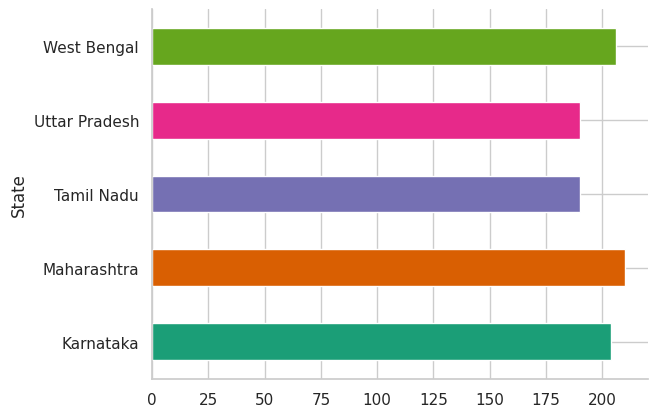

In [34]:
# @title State

from matplotlib import pyplot as plt
import seaborn as sns
accident_data.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Summary Statistics

In [24]:
# Summary statistics
summary_stats = accident_data.describe()

# Group by state and accident severity
severity_by_state = accident_data.groupby(['State', 'Accident_Severity']).size().unstack()

# Display summary statistics and severity by state
summary_stats, severity_by_state


(       Accident_ID            Time_of_Accident   Casualties   Driver_Age
 count  1000.000000                        1000  1000.000000  1000.000000
 mean    500.500000  2023-06-30 05:58:33.600000     0.988000    41.172000
 min       1.000000         2023-01-01 06:00:00     0.000000    18.000000
 25%     250.750000         2023-03-28 01:30:00     0.000000    30.000000
 50%     500.500000         2023-06-30 04:00:00     1.000000    41.000000
 75%     750.250000         2023-09-27 12:00:00     2.000000    53.000000
 max    1000.000000         2023-12-30 21:00:00     5.000000    64.000000
 std     288.819436                         NaN     0.999427    13.173456,
 Accident_Severity  Fatal  Major  Minor
 State                                 
 Karnataka             17     60    127
 Maharashtra           17     64    129
 Tamil Nadu            19     60    111
 Uttar Pradesh         18     65    107
 West Bengal           29     63    114)

Plotting Additional Visualizations

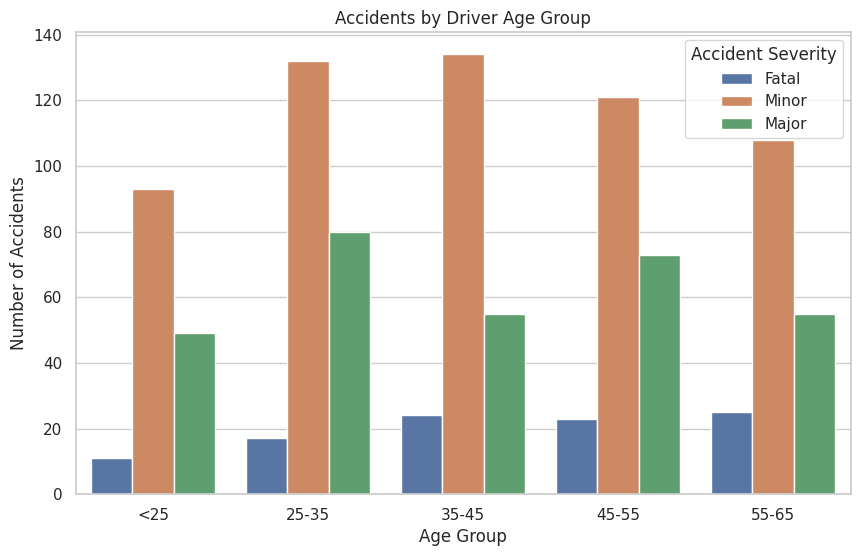

In [25]:
# Create age groups
accident_data['Age_Group'] = pd.cut(accident_data['Driver_Age'], bins=[0, 25, 35, 45, 55, 65], labels=['<25', '25-35', '35-45', '45-55', '55-65'])

# Plot accidents by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=accident_data, x='Age_Group', hue='Accident_Severity')
plt.title('Accidents by Driver Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Accidents')
plt.legend(title='Accident Severity')
plt.show()


Accidents Over Time

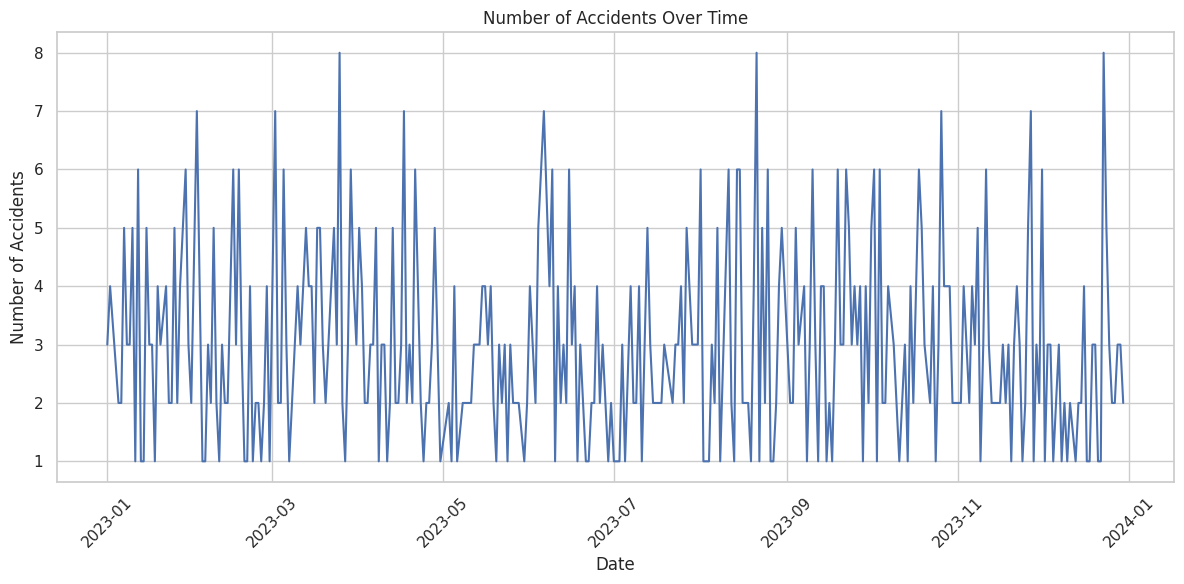

In [26]:
# Extract date from Time_of_Accident
accident_data['Date'] = accident_data['Time_of_Accident'].dt.date

# Group by date
accidents_over_time = accident_data.groupby('Date').size()

# Plot accidents over time
plt.figure(figsize=(12, 6))
plt.plot(accidents_over_time.index, accidents_over_time.values)
plt.title('Number of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Heatmap of Accidents

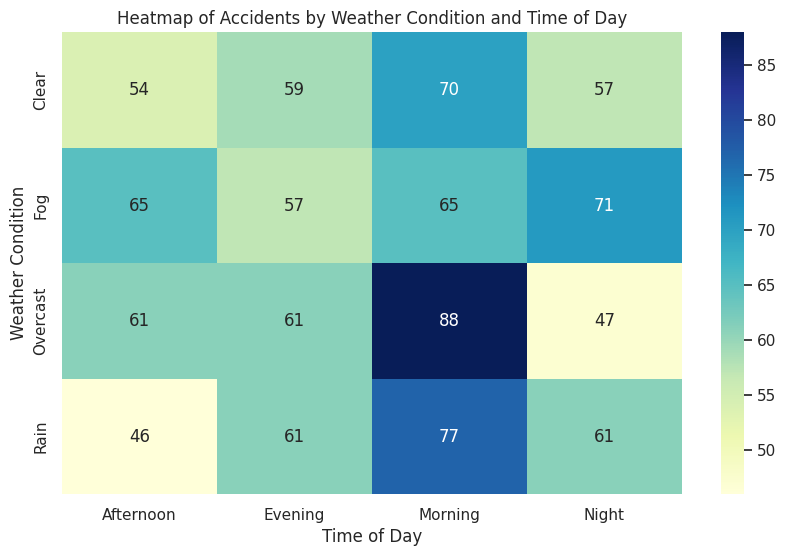

In [27]:
# Create a pivot table for heatmap
heatmap_data = accident_data.pivot_table(index='Weather_Condition', columns='Time_of_Day', values='Accident_ID', aggfunc='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Accidents by Weather Condition and Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Weather Condition')
plt.show()


 Machine Learning Model

In [32]:
# Encode categorical variables
accident_data_encoded = pd.get_dummies(accident_data, columns=['State', 'Vehicle_Type', 'Weather_Condition', 'Road_Type', 'Time_of_Day', 'Age_Group'], drop_first=True) # Include 'Age_Group' in the columns to be encoded

# Features and target variable
X = accident_data_encoded.drop(['Accident_ID', 'Accident_Severity', 'Time_of_Accident', 'Casualties', 'Date', 'Driver_Age'], axis=1)
y = accident_data_encoded['Accident_Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [33]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       Fatal       0.11      0.05      0.07        21
       Major       0.36      0.25      0.30        63
       Minor       0.60      0.75      0.66       116

    accuracy                           0.52       200
   macro avg       0.35      0.35      0.34       200
weighted avg       0.47      0.52      0.49       200

[[ 1  5 15]
 [ 3 16 44]
 [ 5 24 87]]


## Conclusion

- This expanded analysis provides deeper insights into the factors influencing road accidents in India.
- We examined the effects of driver age, weather conditions, and time of day on accident severity.
- The machine learning model suggests which factors are more predictive of accident severity.
- Further work could include the use of real-world datasets and more sophisticated modeling techniques.
